In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



In [2]:
data_train_path = 'Train'
data_test_path = 'Test'
data_val_path = 'Validation'

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path ,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 25 files belonging to 2 classes.


In [5]:
data_Cu = data_train.class_names


In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path, image_size=(img_height, img_width),  batch_size=32, shuffle=False, validation_split=False)


Found 6 files belonging to 2 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path, image_size=(img_height,img_width),shuffle=False,batch_size=32, validation_split=False)


Found 9 files belonging to 2 classes.


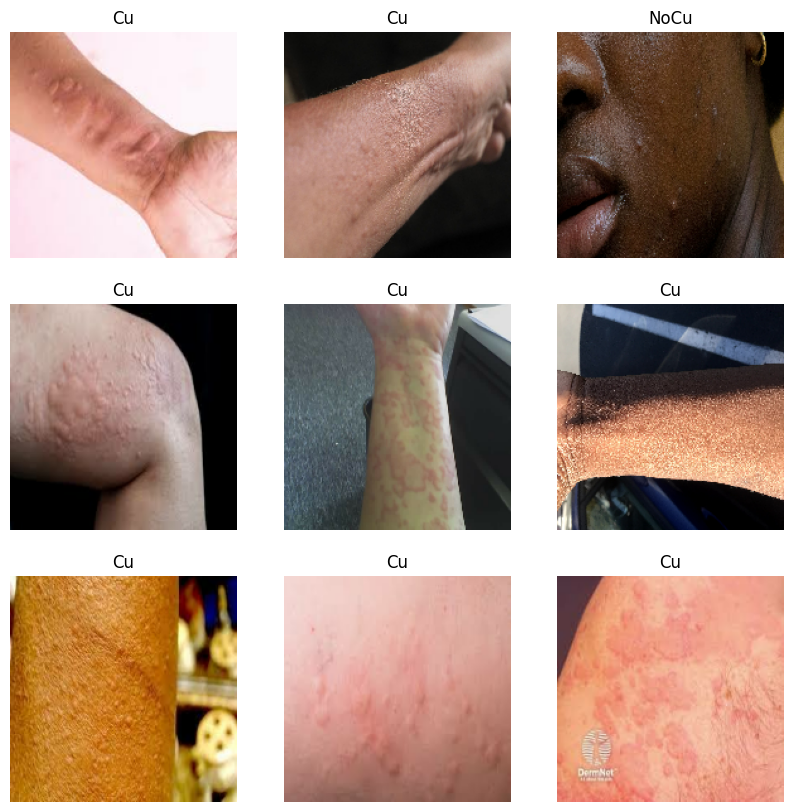

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_Cu[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers


In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
                  layers.MaxPool2D(),
                  layers.Conv2D(64,3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Flatten(),
                  layers.Dropout(0.2),
                  layers.Dense(128),
                  layers.Dense(units = len(data_Cu))

                  
 

])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data = data_val, epochs=epochs_size,) 

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.7600 - loss: 0.6046 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step - accuracy: 0.7600 - loss: 7.1396 - val_accuracy: 1.0000 - val_loss: 3.0796e-06
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step - accuracy: 0.7600 - loss: 2.7605 - val_accuracy: 0.1667 - val_loss: 1.3949
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step - accuracy: 0.4800 - loss: 0.9443 - val_accuracy: 0.5000 - val_loss: 0.8007
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step - accuracy: 0.7200 - loss: 0.5457 - val_accuracy: 1.0000 - val_loss: 0.0960
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step - accuracy: 0.8000 - loss: 0.2913 - val_accuracy: 1.0000 - val_loss: 0.0304
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step - accuracy: 0.7600 - loss: 0.4300 - val_accuracy: 1.0000 - val_loss: 0.0331
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step - accuracy: 0.7600 - loss: 0.3774 - val_accuracy: 1.0000 - va

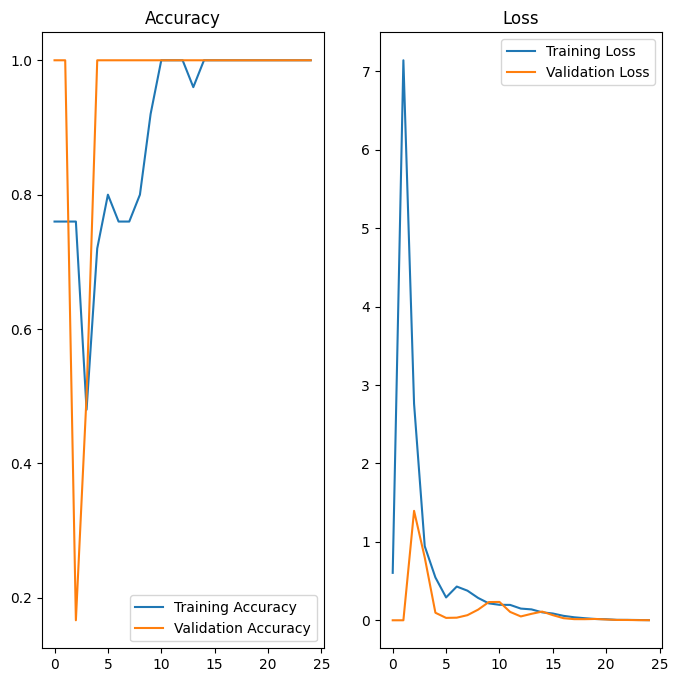

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))

# First subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Second subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [16]:
image = 'noncu2.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)  # Corrected method name
img_bat = tf.expand_dims(img_arr, 0)  # Adding a batch dimension


In [17]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


In [18]:
score = tf.nn.softmax(predict)

In [19]:
disease_name = data_Cu[np.argmax(score)]  # Get the disease name based on the highest score index
accuracy = np.max(score) * 100  # Calculate the accuracy as a percentage

print('Disease in image is {} with accuracy of {:.2f}%'.format(disease_name, accuracy))


Disease in image is Cu with accuracy of 99.88%


In [20]:
model.save('Image_classify.h5')
